### Filter By Boro

In [3]:
import pandas as pd
df = pd.read_csv('data/data.csv')
df = df[df.BORO_NM=="MANHATTAN"]
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/data.csv'

### Issue 1 - Interesting Crime 

In [20]:
df = pd.read_csv('data/data.csv')
df = df[df.OFNS_DESC=="FORGERY"]
df.sort_values("PREM_TYP_DESC")
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
43,283046394,1,MANHATTAN,01/01/2024,12:00:00,03/01/2024,14:49:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,982380.0,197844.0,40.709715,-74.006744,"(40.709715, -74.006744)",POINT (-74.006744 40.709715)
140,279794668,18,MANHATTAN,01/01/2024,22:10:00,01/01/2024,22:15:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,988669.0,216684.0,40.761423,-73.984048,"(40.7614228372042, -73.9840483917395)",POINT (-73.9840483917395 40.7614228372042)
306,283795860,79,BROOKLYN,01/01/2024,00:00:00,03/14/2024,18:30:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,998477.0,191688.0,40.692805,-73.948695,"(40.692805, -73.948695)",POINT (-73.948695 40.692805)
378,279789943,81,BROOKLYN,01/01/2024,16:47:00,01/01/2024,17:06:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1004919.0,187068.0,40.680111,-73.925480,"(40.680111039841414, -73.92548046570226)",POINT (-73.92548046570226 40.680111039841414)
564,279786364,41,BRONX,01/01/2024,16:27:00,01/01/2024,16:35:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1014249.0,238403.0,40.820986,-73.891613,"(40.82098580550746, -73.8916133211247)",POINT (-73.8916133211247 40.82098580550746)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133509,284584352,13,MANHATTAN,03/31/2024,17:43:00,03/31/2024,18:04:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,988276.0,210451.0,40.744317,-73.985470,"(40.744317, -73.98547)",POINT (-73.98547 40.744317)
133658,284588498,24,MANHATTAN,03/31/2024,21:55:00,03/31/2024,22:00:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,995643.0,230619.0,40.799665,-73.958848,"(40.799665, -73.958848)",POINT (-73.958848 40.799665)
133778,286387410,63,BROOKLYN,03/31/2024,12:00:00,04/04/2024,12:00:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,F,1011447.0,162943.0,40.613877,-73.902040,"(40.613877, -73.90204)",POINT (-73.90204 40.613877)
134374,284562245,103,QUEENS,03/31/2024,02:20:00,03/31/2024,02:27:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1037244.0,195024.0,40.701814,-73.808874,"(40.70181387328086, -73.80887433026759)",POINT (-73.80887433026759 40.70181387328086)


<br>### Issue 2 - Join Crimes and Arrests<br>

In [2]:
import pandas as pd
df_1 = pd.read_csv('data/arrests.csv')
df_1.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [3]:
df_2 = pd.read_csv('data/crimes.csv')
df_2.columns
df_2.head(5)

,Unnamed: 0,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,51870,282411683,60,BROOKLYN,02/18/2024,12:10:00,02/18/2024,12:18:00,COMPLETED,(null),...,NaN,UNKNOWN,UNKNOWN,E,990148.0,155255.0,40.592813,-73.978763,"(40.592813307614215, -73.97876328945328)",POINT (-73.97876328945328 40.592813307614215)
1,116441,279933201,18,MANHATTAN,01/04/2024,00:15:00,01/04/2024,00:25:00,COMPLETED,(null),...,NaN,25-44,WHITE,F,988757.0,216332.0,40.760457,-73.983731,"(40.76045664314996, -73.98373096728758)",POINT (-73.98373096728758 40.76045664314996)
2,23539,281846733,20,MANHATTAN,09/07/2023,23:35:00,12/01/2023,12:00:00,COMPLETED,(null),...,NaN,65+,WHITE,M,989200.0,222851.0,40.778351,-73.982126,"(40.778351, -73.982126)",POINT (-73.982126 40.778351)
3,188022,281559921,75,BROOKLYN,01/30/2024,15:50:00,01/30/2024,15:56:00,COMPLETED,(null),...,NaN,25-44,BLACK HISPANIC,M,1016845.0,182111.0,40.666469,-73.882507,"(40.666469319202875, -73.8825067547414)",POINT (-73.8825067547414 40.666469319202875)
4,193201,286123283,50,BRONX,04/29/2024,01:00:00,04/30/2024,11:15:00,COMPLETED,(null),...,NaN,25-44,WHITE HISPANIC,F,1011088.0,271303.0,40.911299,-73.902901,"(40.911299, -73.902901)",POINT (-73.902901 40.911299)


In [4]:
df_1[['PD_CD','PD_DESC', 'KY_CD', 'OFNS_DESC','LAW_CODE', 'LAW_CAT_CD']]

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD
0,153.0,RAPE 3,104.0,RAPE,PL 1302503,F
1,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F
2,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F
3,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M
4,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F
...,...,...,...,...,...,...
128773,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M
128774,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510D,F
128775,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M
128776,510.0,"CONTROLLED SUBSTANCE, INTENT T",117.0,DANGEROUS DRUGS,PL 2200601,F


In [5]:
df_2[['KY_CD','LAW_CAT_CD','PD_DESC','OFNS_DESC']]

,KY_CD,LAW_CAT_CD,PD_DESC,OFNS_DESC
0,235,MISDEMEANOR,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS
1,344,MISDEMEANOR,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES
2,109,FELONY,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",GRAND LARCENY
3,348,MISDEMEANOR,LEAVING SCENE-ACCIDENT-PERSONA,VEHICLE AND TRAFFIC LAWS
4,109,FELONY,"LARCENY,GRAND OF VEHICULAR/MOTORCYCLE ACCESSORIES",GRAND LARCENY
...,...,...,...,...
124995,121,FELONY,"MISCHIEF,CRIMINAL, UNCL 2ND",CRIMINAL MISCHIEF & RELATED OF
124996,121,FELONY,"MISCHIEF, CRIMINAL 3 & 2, OF M",CRIMINAL MISCHIEF & RELATED OF
124997,359,MISDEMEANOR,"CONTEMPT,CRIMINAL",OFFENSES AGAINST PUBLIC ADMINI
124998,110,FELONY,"LARCENY,GRAND OF AUTO",GRAND LARCENY OF MOTOR VEHICLE


In [6]:
print(df_1['KY_CD'].dtype)
print(df_2['KY_CD'].dtype)

float64
int64


In [7]:
df_2['KY_CD'] = df_2['KY_CD'].astype(float)

In [8]:
df_1_subset = df_1[['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC','LAW_CODE', 'ARREST_BORO', 'ARREST_PRECINCT','JURISDICTION_CODE']]

In [9]:
df_2_subset = df_2[['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM','JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD','PD_CD', 'PD_DESC']]

In [10]:
df_subset_mg = df_1_subset.merge(df_2_subset, on=['PD_CD','KY_CD'], how='left', suffixes=('_arrest','_crime'))

In [11]:
print(df_subset_mg.head(10))

   ARREST_KEY ARREST_DATE  PD_CD PD_DESC_arrest  KY_CD OFNS_DESC    LAW_CODE  \
0   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
1   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
2   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
3   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
4   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
5   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
6   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
7   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
8   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
9   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   

  ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE_arrest CMPLNT_NUM  \
0           K               77                  

### Issue 3 - NBA Games <br>

In [50]:
import pandas as pd
import sqlite3

con = sqlite3.connect("/Users/kyueunkim/Documents/GitHub/UMD-INST627-Fall2024/data/nba.sqlite")
games = pd.read_sql_query("SELECT * FROM game LIMIT 100", con)
active_players = pd.read_sql_query("SELECT full_name FROM player WHERE is_active=TRUE", con)

In [12]:
games.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')

In [7]:
games.head(5)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,0024600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,None,None,None,None,None,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,0024600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,None,None,None,None,None,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,0024600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,None,None,None,None,None,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,0024600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,None,None,None,None,None,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,0024600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,None,None,None,None,None,NaN,50.0,17,0,Regular Season


In [8]:
active_players.head(5)

,full_name
0,Precious Achiuwa
1,Steven Adams
2,Bam Adebayo
3,Ochai Agbaji
4,Santi Aldama


In [14]:
games_recent = pd.read_sql_query("""
    SELECT season_id, season_type, team_name_home, game_Date
    FROM game
    ORDER BY season_id DESC"""
    , con)
games_recent.head(100) 

# Selected Team: Boston Celtics

,season_id,season_type,team_name_home,game_date
0,42022,Playoffs,Sacramento Kings,2023-04-15 00:00:00
1,42022,Playoffs,Boston Celtics,2023-04-15 00:00:00
2,42022,Playoffs,Cleveland Cavaliers,2023-04-15 00:00:00
3,42022,Playoffs,Philadelphia 76ers,2023-04-15 00:00:00
4,42022,Playoffs,Milwaukee Bucks,2023-04-16 00:00:00
...,...,...,...,...
95,42021,Playoffs,Phoenix Suns,2022-04-19 00:00:00
96,42021,Playoffs,Memphis Grizzlies,2022-04-19 00:00:00
97,42021,Playoffs,Miami Heat,2022-04-19 00:00:00
98,42021,Playoffs,Milwaukee Bucks,2022-04-20 00:00:00


In [ ]:
games_sliced = games.iloc[:,8:28]
games_sliced.head(5)

# Selected columns for calculating average score: pts_home, pts_away

In [31]:
games_bc_avg = pd.read_sql_query("""
    SELECT team_name_home, avg(pts_home) AS home_avg, avg(pts_away) AS away_avg
    FROM game
    WHERE team_name_home = 'Boston Celtics'
    """, con)
print(games_bc_avg)

   team_name_home    home_avg    away_avg
0  Boston Celtics  106.278489  100.226633


### Issue 4 - Analytical Questions <br>

#### Business Objective
Which team would be the best to invest in for the upcoming season?

#### Analytical Questions
1. Which teams have most consistently had the highest scores?
2. Which team has had below average for the most consecutive seasons?
3. Which team has consistently made it to the playoffs?
4. Which teams have shown the greatest improvement over the past five years?
5. Which teams have demonstrated the best defensive metrics (e.g., blocks and steals), and how has this impacted their winning consistency?

### Issue 5 - Descripitive Statistics
### Issue 6 - Storyboard 
### Issue 7 - Visualization <br>

In [6]:
import pandas as pd
import sqlite3

con = sqlite3.connect("../data/nba.sqlite")
games = pd.read_sql_query("SELECT * FROM game", con)
active_players = pd.read_sql_query("SELECT full_name FROM player WHERE is_active=TRUE", con)

In [7]:
games.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Which teams have most consistently had the highest scores? <br>

In [29]:
# games data excluding all-star games (2019-2023)

games_recent_5yrs = pd.read_sql_query("""
	SELECT * FROM game 
	WHERE season_type NOT IN ('All Star', 'All-Star') 
	AND game_date BETWEEN '2019-01-01 00:00:00' AND '2023-12-31 23:59:59'
    ORDER BY game_date DESC
""", con)

#### Introduction

Who's the most powerful team in the NBA? In evaluating teams for investment potential, scoring ability has traditionally been a key metric. With NBA scoring increasing in recent seasons, investors need to look deeper than just offensive output. Is a high-scoring offense truly indicative of a team's value and future success?
To identify the most promising investment opportunities for the upcoming season, we analyzed scoring patterns from 2019-2023, examining not just point totals but offensive consistency. This comprehensive analysis aims to uncover teams that demonstrate sustainable excellence.

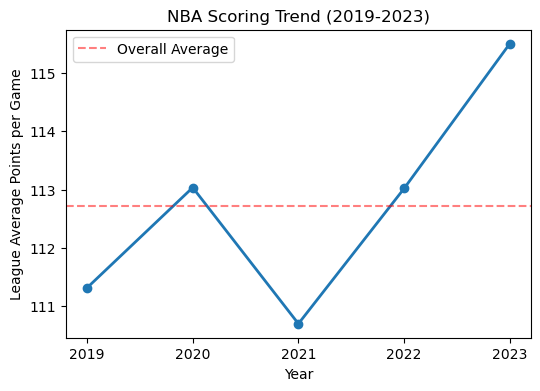

In [32]:
# visualization for Introduction - League average trend
plt.figure(figsize=(6,4))
yearly_avg = regular_games.groupby('game_year').agg({
    'pts_home' : 'mean', 'pts_away' : 'mean'}).reset_index()
yearly_avg['points'] = (yearly_avg['pts_home'] + yearly_avg['pts_away'])/2
yearly_avg['game_year'] = yearly_avg['game_year'].astype(int)

plt.plot(yearly_avg['game_year'], yearly_avg['points'], marker='o', linewidth=2)
plt.axhline(y=yearly_avg['points'].mean(), color='r', linestyle='--', alpha=0.5, label='Overall Average')
plt.xticks(yearly_avg['game_year'])
plt.title('NBA Scoring Trend (2019-2023)')
plt.xlabel('Year')
plt.ylabel('League Average Points per Game')
plt.legend()
plt.show()

#### Rising Action

Initial market analysis might attract investors to the Milwaukee Bucks, who lead with an average of 116.44 points per game. However, high performance must be sustainable to ensure reliable returns. Our analysis shows that the top 10 teams all average over 113 points, indicating intense competition and multiple investment opportunities. The key question now is “Which team's offensive success is most sustainable?"

In [35]:
# mean, standard deviation of scores for each team
score_stats_home = games_recent_5yrs.groupby(['team_id_home','team_name_home'])['pts_home'].agg(['mean', 'std', 'count'])
score_stats_away = games_recent_5yrs.groupby(['team_id_away','team_name_away'])['pts_away'].agg(['mean', 'std', 'count'])

score_stats_home.index.names = ['team_id', 'team_name']
score_stats_away.index.names = ['team_id', 'team_name']

combined_stats = pd.concat([score_stats_home, score_stats_away])
score_stats_all = combined_stats.groupby(['team_id', 'team_name']).mean()
score_stats_all['total_games'] = combined_stats.groupby(['team_id', 'team_name'])['count'].sum()
score_stats_all = score_stats_all[score_stats_all['total_games'] >= 100]

# teams with highest average
print("Teams with highest average scores:")
print(score_stats_all.sort_values(by='mean', ascending=False).head(10))

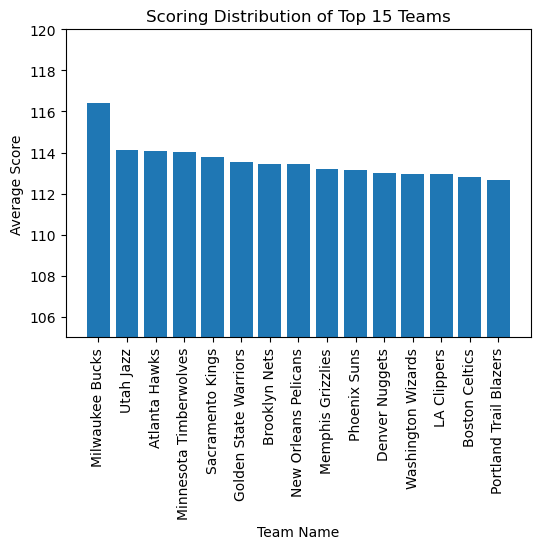

In [73]:
# visualization for Rising action - Top 15 teams scoring
top10_teams_scoring = score_stats_all.reset_index().sort_values(by='mean', ascending=False).head(15)

plt.figure(figsize=(6,4))
plt.bar(top10_teams_scoring['team_name'], top10_teams_scoring['mean'])
plt.xticks(rotation=90)
plt.title('Scoring Distribution of Top 15 Teams')
plt.xlabel('Team Name')
plt.ylabel('Average Score')
plt.ylim(105, 120)
plt.show()

#### Climax

The most meaningful insight came when we examined scoring consistency. While the Milwaukee Bucks led in scoring power, the Utah Jazz stood out in offensive efficiency, maintaining a high scoring average (114.12 points) with the league's lowest standard deviation (11.35). This remarkable consistency, coupled with their scoring volume, suggests an optimal balance of return and risk.

Additionally, teams like the New Orleans Pelicans, Phoenix Suns, and Denver Nuggets demonstrated exceptional consistency across over 400 games, despite not leading in raw scoring numbers. This highlights that offensive stability might be just as valuable as scoring power.

In [54]:
# teams with consistent scoring
print("Most consistent scoring teams (lowest standard deviation):")
print(score_stats_all.sort_values(by='std').head(10))

Most consistent scoring teams (lowest standard deviation):
                                         mean        std  count  total_games
team_id    team_name                                                        
1610612762 Utah Jazz               114.124126  11.353901  196.5          393
1610612739 Cleveland Cavaliers     107.244895  11.354891  182.0          364
1610612740 New Orleans Pelicans    113.429579  11.357125  184.5          369
1610612756 Phoenix Suns            113.174049  11.591735  205.5          411
1610612748 Miami Heat              108.997146  11.596273  217.5          435
1610612761 Toronto Raptors         111.561036  11.654833  203.0          406
1610612743 Denver Nuggets          112.986301  11.774490  219.0          438
1610612753 Orlando Magic           107.049138  11.822853  189.0          378
1610612750 Minnesota Timberwolves  114.046378  11.995903  184.0          368
1610612765 Detroit Pistons         106.855801  11.997323  183.0          366


/var/folders/b2/t2bk4jsj6dz6nftdjx4m23w00000gn/T/ipykernel_83950/3344975267.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top10_teams_consistent['team_name'], rotation=90)


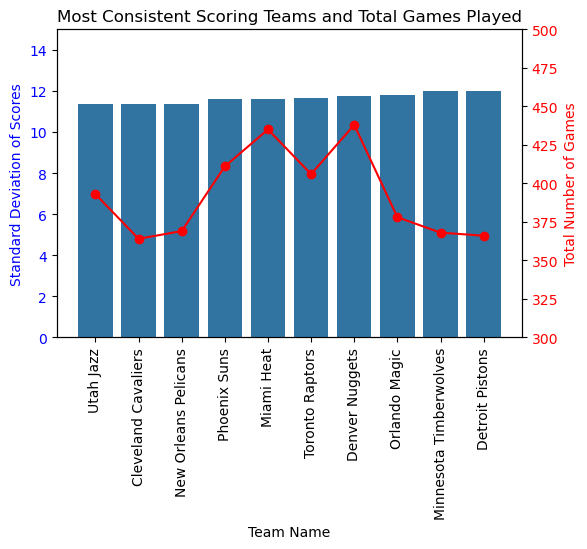

In [72]:
# visualization for Climax - Top 10 teams consistency 
top10_teams_consistent = score_stats_all.reset_index().sort_values(by='std', ascending=True).head(10)

fig, ax1 = plt.subplots(figsize=(6,4))

# Bar plot for standard deviation (left y-axis)
sns.barplot(data=top10_teams_consistent, x='team_name', y='std', ax=ax1)
ax1.set_ylabel('Standard Deviation of Scores', color='blue')
ax1.set_xlabel('Team Name')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 15)
ax1.set_title('Most Consistent Scoring Teams and Total Games Played')
ax1.set_xticklabels(top10_teams_consistent['team_name'], rotation=90)

# Secondary axis (right y-axis) for total number of games
ax2 = ax1.twinx()
ax2.plot(top10_teams_consistent['team_name'], top10_teams_consistent['total_games'], color='red', marker='o', linestyle='-')
ax2.set_ylabel('Total Number of Games', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(300, 500)

plt.show()

#### Falling Action

This discovery showed us that being the best isn't just about scoring the most points. It's about being able to perform well game after game. While teams with higher scoring averages might attract immediate attention, the Utah Jazz's combination of strong scoring and consistency supports long-term value appreciation.

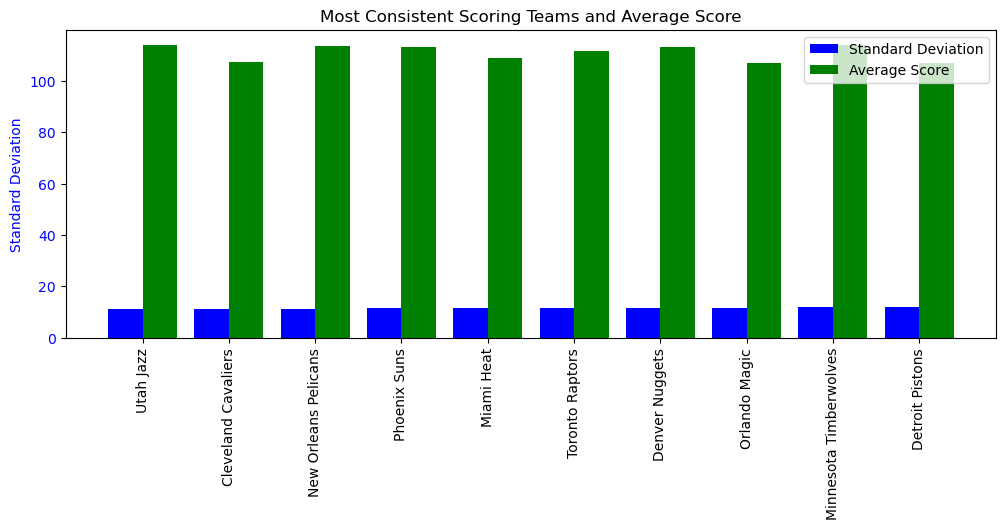

In [85]:
# visualization for Falling action - Top 10 teams consistency & scoring

import numpy as np
fig, ax1 = plt.subplots(figsize=(12,4))

# Bar plot for standard deviation (left y-axis)
bars1 = ax1.bar(np.arange(len(top10_teams_consistent)) - 0.2, 
               top10_teams_consistent['std'],
               width=0.4,
               color='blue',
               label='Standard Deviation')
ax1.set_ylabel('Standard Deviation', color='Blue')
ax1.tick_params(axis='y', labelcolor='Blue')

# Bar plot for average score (right y-axis)
bars2 = ax1.bar(np.arange(len(top10_teams_consistent)) + 0.2, 
               top10_teams_consistent['mean'],
               width=0.4,
               color='green',
               label='Average Score')
ax2.set_ylabel('Average Score', color='Green')
ax2.tick_params(axis='y', labelcolor='Green')

ax1.set_title('Most Consistent Scoring Teams and Average Score')
ax1.set_xticks(range(len(top10_teams_consistent)))
ax1.set_xticklabels(top10_teams_consistent['team_name'], rotation=90)
ax1.legend()

plt.show()

#### Resolution

Our analysis suggests three investment opportunities:
1. Premium Investment (Utah Jazz): Balance of high scoring and consistency, suggesting strong fundamentals and reliable returns
2. Value Opportunities (New Orleans Pelicans, Phoenix Suns, Denver Nuggets): Strong consistency metrics suggest possible market undervaluation
3. Growth Potential (Minnesota Timberwolves): Higher scoring but more variable
The Utah Jazz’s combination of offensive excellence and consistency makes them a particularly attractive investment option.

#### 2. Which team has had below average for the most consecutive seasons?

#### Introduction

While NBA scoring ability is often viewed as a key indicator of team success, understanding offensive struggles can uncover unique investment opportunities and provide valuable assessment benchmarks. Analyzing scoring patterns across all season types—preseason, regular season, and playoffs—from 2019 to 2023, we identified teams consistently underperforming the league average. These teams may represent undervalued assets or stable yet overlooked options in the market.

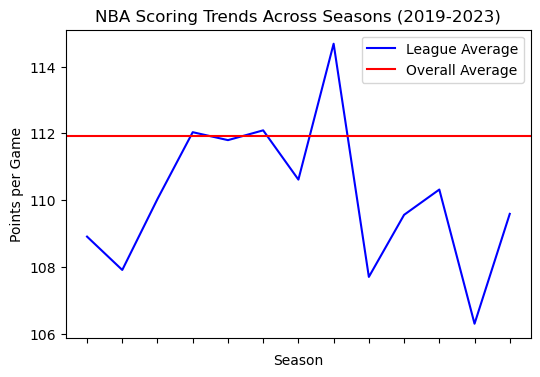

In [94]:
# visualization for introduction

plt.figure(figsize=(6,4))
yearly_avg = all_games.groupby('season_id')['points'].mean()
plt.plot(yearly_avg.index, yearly_avg.values, 'b-', label='League Average')
plt.axhline(y=season_avg, color='r', linestyle='-', label='Overall Average')
plt.title('NBA Scoring Trends Across Seasons (2019-2023)')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.legend()
plt.show()

#### Rising Action

Our analysis showed that a league's average scoring was 111.92 points per game, establishing a clear benchmark for team performance evaluation. Using this threshold, we identified teams with persistent offensive challenges, potentially indicating systematic issues that could affect their value.

In [13]:
# average points per season
season_avg = pd.concat([games_recent_5yrs['pts_home'], games_recent_5yrs['pts_away']]).mean()

home_games = games_recent_5yrs[['season_id', 'team_id_home', 'team_name_home', 'pts_home']].rename(columns={
    'team_id_home': 'team_id',
    'team_name_home': 'team_name',
    'pts_home': 'points'
})
away_games = games_recent_5yrs[['season_id', 'team_id_away', 'team_name_away', 'pts_away']].rename(columns={
    'team_id_away': 'team_id',
    'team_name_away': 'team_name',
    'pts_away': 'points'
})
all_games = pd.concat([home_games, away_games])

# average points per team per season
team_season_avg = all_games.groupby(['season_id', 'team_id', 'team_name'])['points'].mean().reset_index()

# below average seasons
team_season_avg['league_avg'] = season_avg
team_season_avg['below_average'] = team_season_avg['points'] < team_season_avg['league_avg']
team_season_avg = team_season_avg.sort_values(['team_id', 'season_id'])
print(team_season_avg.head(10))

    season_id     team_id       team_name      points  league_avg  \
60      12022       15019  Adelaide 36ers  116.000000  111.924325   
0       12020  1610612737   Atlanta Hawks  112.750000  111.924325   
30      12021  1610612737   Atlanta Hawks  103.250000  111.924325   
61      12022  1610612737   Atlanta Hawks  112.750000  111.924325   
92      22018  1610612737   Atlanta Hawks  116.391304  111.924325   
122     22019  1610612737   Atlanta Hawks  111.761194  111.924325   
152     22020  1610612737   Atlanta Hawks  113.694444  111.924325   
182     22021  1610612737   Atlanta Hawks  113.939024  111.924325   
212     22022  1610612737   Atlanta Hawks  118.426829  111.924325   
274     42020  1610612737   Atlanta Hawks  106.277778  111.924325   

     below_average  
60           False  
0            False  
30            True  
61           False  
92           False  
122           True  
152          False  
182          False  
212          False  
274           True  


Text(0, 0.5, 'Points per Game')

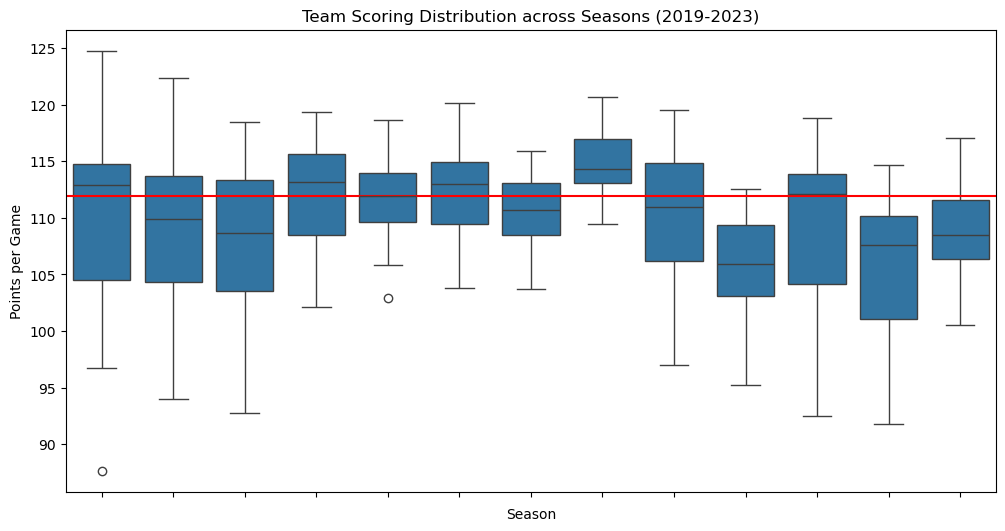

In [93]:
# visualization for rising action

plt.figure(figsize=(12, 6))
sns.boxplot(data=team_season_avg, x='season_id', y='points',
            showfliers=True)
plt.axhline(y=season_avg, color='r', linestyle='-', label='League Average')
plt.title('Team Scoring Distribution across Seasons (2019-2023)')
plt.xticks(ticks=plt.xticks()[0], labels=[])
plt.xlabel('Season')
plt.ylabel('Points per Game')

#### Climax

We discovered a striking contrast in scoring consistency across the NBA. The Orlando Magic and Detroit Pistons have notably struggled with scoring, each recording 9 consecutive seasons below the league average - a persistent challenge rather than a temporary slump. The Miami Heat and Cleveland Cavaliers followed with 7-season streaks, suggesting potential value opportunities if these offensive challenges can be addressed.

In [14]:
# consecutive streaks
def consecutive_streak(group):
   current_streak = 0
   max_streak = 0
   
   for below_avg in group:
       if below_avg:
           current_streak += 1
           max_streak = max(max_streak, current_streak)
       else:
           current_streak = 0
           
   return max_streak

team_streaks = team_season_avg.groupby('team_name')['below_average'].apply(consecutive_streak)
team_streaks = team_streaks.sort_values(ascending=False)

print("Teams with most consecutive below-average seasons:")
print(team_streaks.head(10))

Teams with most consecutive below-average seasons:
team_name
Orlando Magic          9
Detroit Pistons        9
Miami Heat             7
Cleveland Cavaliers    7
Charlotte Hornets      5
Houston Rockets        5
San Antonio Spurs      4
Chicago Bulls          4
New York Knicks        4
Los Angeles Lakers     4
Name: below_average, dtype: int64


Text(0, 0.5, 'Consecutive Seasons Below Average')

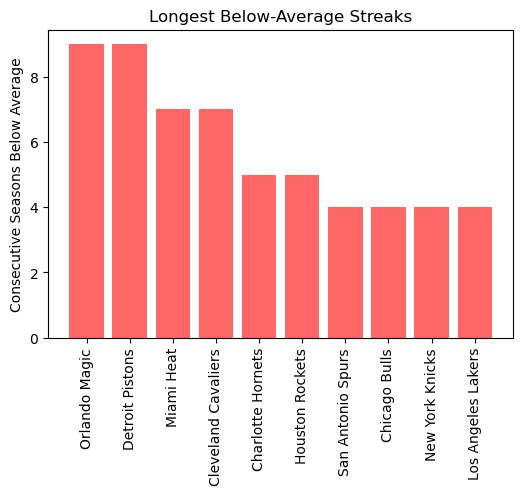

In [103]:
# visualization for climax

below_average_streaks = team_streaks.sort_values(ascending=False).head(10)
plt.figure(figsize=(6, 4))
plt.bar(below_average_streaks.index, below_average_streaks.values, color='red', alpha=0.6)
plt.title('Longest Below-Average Streaks')
plt.tick_params(axis='x', rotation=90)
plt.ylabel('Consecutive Seasons Below Average')


In [15]:
team_streaks = team_streaks.sort_values(ascending=True)

print("Teams with least consecutive below-average seasons:")
print(team_streaks.head(10))

Teams with least consecutive below-average seasons:
team_name
Adelaide 36ers               0
Ra'anana Maccabi Ra'anana    1
Golden State Warriors        1
New Orleans Pelicans         1
Sacramento Kings             1
Utah Jazz                    2
Boston Celtics               2
Brooklyn Nets                2
Dallas Mavericks             2
Phoenix Suns                 2
Name: below_average, dtype: int64


#### Climax

Meanwhile, teams like the New Orleans Pelicans, Utah Jazz, and Phoenix Suns demonstrated remarkable offensive stability, rarely falling below the league average. This polarization suggests interesting investment implications: while struggling teams might offer value opportunities, consistently strong performers could represent safer, premium investments.

Text(0, 0.5, 'Consecutive Seasons Below Average')

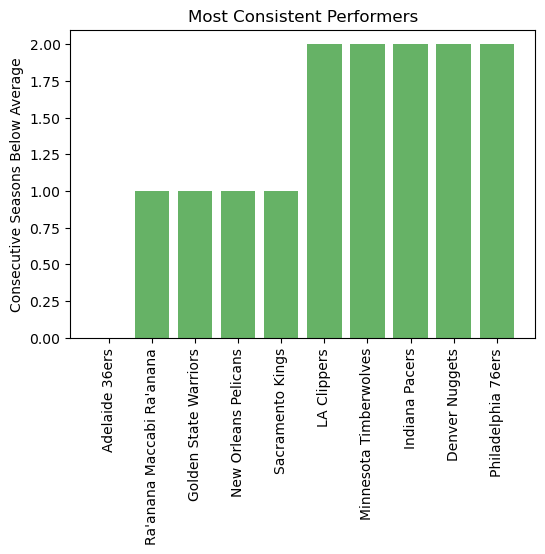

In [105]:
# visualization for climax

below_average_streaks_rev = team_streaks.sort_values(ascending=True).head(10)
plt.figure(figsize=(6, 4))
plt.bar(below_average_streaks_rev.index, below_average_streaks_rev.values, color='green', alpha=0.6)
plt.title('Most Consistent Performers')
plt.tick_params(axis='x', rotation=90)
plt.ylabel('Consecutive Seasons Below Average')


#### Falling Action

The pattern of below-average scoring extends beyond individual teams. The Charlotte Hornets and Houston Rockets recorded five consecutive seasons of below-average performance, while several prestigious franchises, including the Chicago Bulls, New York Knicks, and even the Los Angeles Lakers, experienced four-season streaks of subpar scoring. This trend highlights a key market insight: a team's historical prestige or market size does not guarantee consistent offensive performance, emphasizing that organizational effectiveness is a critical factor in scoring consistency.

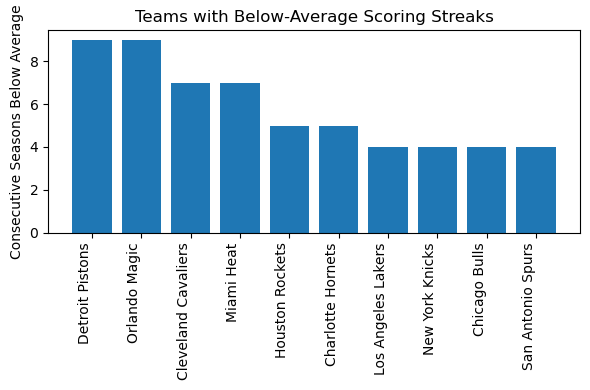

In [108]:
# visualization for falling action

struggling_franchises = team_streaks[team_streaks >= 4].sort_values(ascending=False)

plt.figure(figsize=(6,4))

bars = plt.bar(struggling_franchises.index, struggling_franchises.values)
prestigious_teams = ['Los Angeles Lakers', 'Chicago Bulls', 'New York Knicks']
plt.title('Teams with Below-Average Scoring Streaks')
plt.ylabel('Consecutive Seasons Below Average')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

#### Resolution

From an investment perspective, these struggling teams present contrasting opportunities. The Orlando Magic and Detroit Pistons’ persistent underperformance might indicate unique investment opportunities if their valuations reflect these struggles, but require careful assessment of their turnaround potential. 
Conversely, more consistent performers like the Golden State Warriors and New Orleans Pelicans offer safer investment opportunities, proven by their track records. 

#### 3. Which team has consistently made it to the playoffs? 

#### Introduction

In the NBA, playoff success is a crucial indicator of a team's value and investment potential. Making the playoffs not only validates a team's competitiveness but also drives revenue through ticket sales, merchandise, and media exposure. We analyzed playoff performance from 2019-2023 to identify which teams have demonstrated the most reliable postseason presence and how this might inform investment decisions.

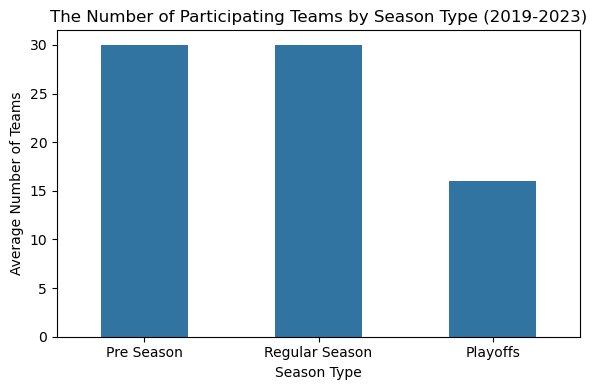

In [138]:
# visualizaiton for introduction

unique_teams = games_recent_5yrs.groupby(['season_id', 'season_type'])['team_name_home'].nunique()
avg_unique_teams = unique_teams.groupby('season_type').mean()

season_order = ['Pre Season', 'Regular Season', 'Playoffs']
avg_unique_teams = avg_unique_teams.reindex(season_order)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_unique_teams.index, y=avg_unique_teams.values, width=0.5)

plt.title('The Number of Participating Teams by Season Type (2019-2023)')
plt.xlabel('Season Type')
plt.ylabel('Average Number of Teams')

plt.tight_layout()
plt.show()

#### Rising action

Our analysis revealed interesting patterns in playoff participation. Five teams - the Brooklyn Nets, Denver Nuggets, Philadelphia 76ers, Milwaukee Bucks, and Boston Celtics - achieved a perfect record, making the playoffs in all five seasons. This consistent postseason presence suggests strong organizational stability and reliable performance.

However, playoff appearances alone don't tell the complete story. To truly understand a team's postseason success and potential investment value, we needed to examine how deep these teams went in the playoffs. This meant looking at the total number of playoff games played, which indicates both consistency and championship potential.

In [118]:
# playoff games
playoff_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Playoffs']

# playoff appearances (seasons)
playoff_home_seasons = playoff_games[['season_id', 'team_name_home']].rename(
   columns={'team_name_home': 'team_name'}).drop_duplicates()
playoff_away_seasons = playoff_games[['season_id', 'team_name_away']].rename(
   columns={'team_name_away': 'team_name'}).drop_duplicates()
all_playoff_seasons = pd.concat([playoff_home_seasons, playoff_away_seasons]).drop_duplicates()
playoff_appearances = all_playoff_seasons.groupby('team_name').size().sort_values(ascending=False)

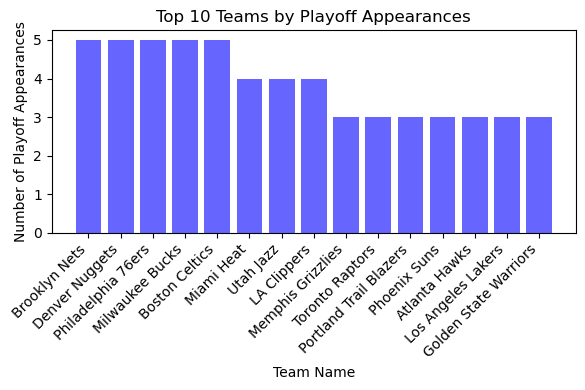

In [122]:
# visualization for rising action

playoff_top_teams = playoff_all.head(15)

plt.figure(figsize=(6, 4))
plt.bar(playoff_top_teams['team_name'], playoff_top_teams['seasons'], color='blue', alpha=0.6)

plt.title('Top 10 Teams by Playoff Appearances')
plt.xlabel('Team Name')
plt.ylabel('Number of Playoff Appearances')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Climax

The Denver Nuggets emerged as the standout performer with 75 playoff games during this period, significantly more than most teams. This indicates not just consistent qualification but sustained success in playoff series, demonstrating their ability to compete at the highest level.
Following closely, the Utah Jazz (68 games) and Golden State Warriors (66 games) showed impressive playoff success despite not making it every season. Their performance is particularly noteworthy as it suggests that when these teams reach the playoffs, they tend to advance further than most, showing exceptional competitive capability.

In [123]:
# total playoff games (rounds)
playoff_home_games = playoff_games[['team_name_home', 'game_id']].rename(
   columns={'team_name_home': 'team_name'})
playoff_away_games = playoff_games[['team_name_away', 'game_id']].rename(
   columns={'team_name_away': 'team_name'})
all_playoff_games = pd.concat([playoff_home_games, playoff_away_games])
playoff_games_count = all_playoff_games.groupby('team_name').size()

# playoff appearances, for both seasons & games
playoff_all = pd.DataFrame({
    'team_name': playoff_appearances.index,
    'seasons': playoff_appearances.values,
    'total_games': playoff_games_count.values
})
    
# success rate
total_seasons = games_recent_5yrs['season_id'].nunique()
playoff_all['success_rate'] = (playoff_all['seasons'] / total_seasons * 100)

print("\nPlayoff appearances and games (2019-2023):")
print(playoff_all[['team_name', 'seasons', 'total_games', 'success_rate']].head(10))


Playoff appearances and games (2019-2023):
            team_name  seasons  total_games  success_rate
0       Brooklyn Nets        5           29     38.461538
1      Denver Nuggets        5           75     38.461538
2  Philadelphia 76ers        5           29     38.461538
3     Milwaukee Bucks        5            5     38.461538
4      Boston Celtics        5            5     38.461538
5          Miami Heat        4           31     30.769231
6           Utah Jazz        4           68     30.769231
7         LA Clippers        4            4     30.769231
8   Memphis Grizzlies        3           57     23.076923
9     Toronto Raptors        3           23     23.076923


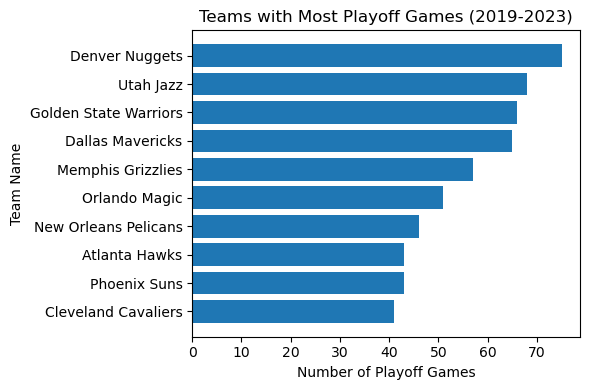

In [128]:
# visualization for climax

plt.figure(figsize=(6,4))
top_performers = playoff_all.nlargest(10, 'total_games').sort_values(by='total_games', ascending=True)
plt.barh(top_performers['team_name'], top_performers['total_games'])
plt.title('Teams with Most Playoff Games (2019-2023)')
plt.xlabel('Number of Playoff Games')
plt.ylabel('Team Name')

plt.tight_layout()
plt.show()

#### Falling Action 

On the opposite end of the spectrum, eight teams struggled with playoff consistency, making only one appearance in five years. These included established franchises like the Chicago Bulls (29 games) and Detroit Pistons (27 games). This stark contrast in performance highlights the significant gap between the league's most and least successful teams in terms of postseason achievement.
The data also reveals that historical prestige doesn't guarantee current success, even teams with rich playoff histories can face extended periods of postseason struggles.

In [132]:
print(playoff_all[['team_name', 'seasons', 'total_games', 'success_rate']].sort_values(by='seasons').head(10))

                team_name  seasons  total_games  success_rate
28     Washington Wizards        1            5      7.692308
26    Cleveland Cavaliers        1           41      7.692308
25      San Antonio Spurs        1            7      7.692308
24       Sacramento Kings        1            7      7.692308
23        Detroit Pistons        1           27      7.692308
22   New Orleans Pelicans        1           46      7.692308
27          Chicago Bulls        1           29      7.692308
21          Orlando Magic        2           51     15.384615
20  Oklahoma City Thunder        2           10     15.384615
19        New York Knicks        2           12     15.384615


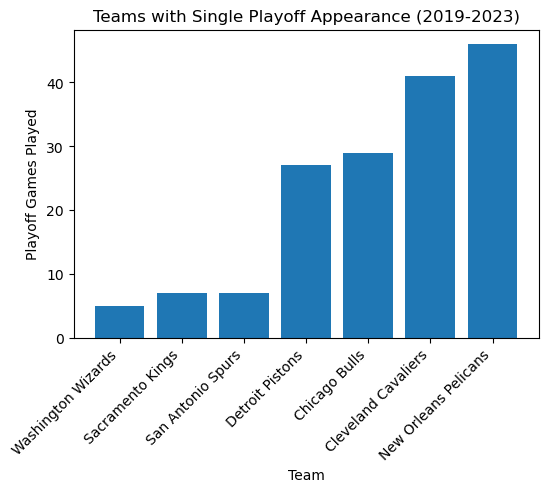

In [135]:
# visualization for falling action

plt.figure(figsize=(6, 4))

playoffs_struggling_teams = playoff_all[playoff_all['seasons'] == 1].sort_values('total_games')
bars = plt.bar(playoffs_struggling_teams['team_name'], playoffs_struggling_teams['total_games'])

plt.title('Teams with Single Playoff Appearance (2019-2023)')
plt.xlabel('Team')
plt.ylabel('Playoff Games Played')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Resolution (revision needed)

From an investment perspective, the Denver Nuggets represent the most attractive opportunity, combining both consistent playoff appearances and sustained postseason runs. 
Teams like the Golden State Warriors and Utah Jazz, despite fewer appearances, demonstrate the ability to make deep playoff runs when they qualify, suggesting strong potential for postseason success.

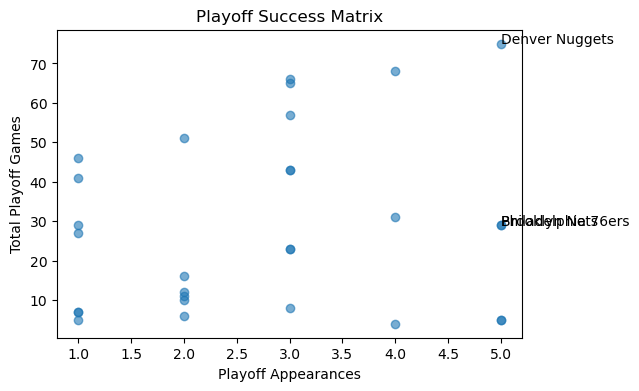

In [142]:
plt.figure(figsize=(6, 4))
plt.scatter(playoff_all['seasons'], playoff_all['total_games'], alpha=0.6)
plt.xlabel('Playoff Appearances')
plt.ylabel('Total Playoff Games')
plt.title('Playoff Success Matrix')

# Annotate top performers
for idx, row in playoff_all.head(3).iterrows():
    plt.annotate(row['team_name'], 
                (row['seasons'], row['total_games']))

#### 4. Which teams have shown the greatest improvement over the past five years?

#### Introduction

In NBA, a team's offensive improvement often signals their future potential. We analyzed scoring patterns from 2019-2023 to identify teams showing the strongest upward trajectories.

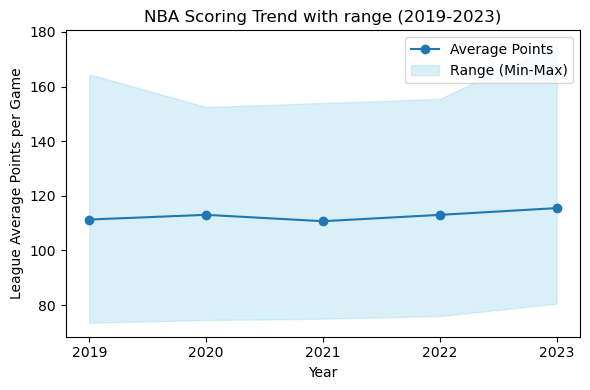

In [150]:
# visualization for introduction

plt.figure(figsize=(6,4))

yearly_stats = regular_games.groupby('game_year').agg({
    'pts_home' : ['mean', 'min', 'max'],
    'pts_away' : ['mean', 'min', 'max']
}).reset_index()

yearly_stats.columns = ['game_year', 'mean_home', 'min_home', 'max_home', 'mean_away', 'min_away', 'max_away']

yearly_stats['points_mean'] = (yearly_stats['mean_home'] + yearly_stats['mean_away']) / 2
yearly_stats['points_min'] = (yearly_stats['min_home'] + yearly_stats['min_away']) / 2
yearly_stats['points_max'] = (yearly_stats['max_home'] + yearly_stats['max_away']) / 2
yearly_avg['game_year'] = yearly_avg['game_year'].astype(int)

plt.plot(yearly_stats['game_year'], yearly_stats['points_mean'], marker='o', label='Average Points')

plt.fill_between(yearly_stats['game_year'], 
                 yearly_stats['points_min'], 
                 yearly_stats['points_max'], 
                 color='skyblue', alpha=0.3, label='Range (Min-Max)')

plt.xticks(yearly_avg['game_year'])
plt.title('NBA Scoring Trend with range (2019-2023)')
plt.xlabel('Year')
plt.ylabel('League Average Points per Game')
plt.legend()
plt.tight_layout()
plt.show()


In [159]:
# extract year from game_date
games_recent_5yrs['game_year'] = pd.to_datetime(games_recent_5yrs['game_date']).dt.year

# limit to regular season
regular_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Regular Season']

# home and away game data 
reg_home_games = regular_games[['team_name_home', 'game_year', 'pts_home']].rename(
    columns={'team_name_home': 'team_name', 'pts_home': 'points'})
reg_away_games = regular_games[['team_name_away', 'game_year', 'pts_away']].rename(
    columns={'team_name_away': 'team_name', 'pts_away': 'points'})
reg_all_games = pd.concat([reg_home_games, reg_away_games])

# average points for each team by year
team_year_avg = reg_all_games.groupby(['team_name', 'game_year'])['points'].mean().reset_index()

# improvement
improvement_list = []

for team in team_year_avg['team_name'].unique():
    team_data = team_year_avg[team_year_avg['team_name'] == team].sort_values('game_year')
    
    total_improvement = team_data['points'].diff().sum() 
    
    improvement_list.append({
        'team_name_home': team, 
        'total_improvement': total_improvement
    })

team_improvement = pd.DataFrame(improvement_list)
team_improvement = team_improvement.sort_values(by='total_improvement', ascending=False)

print("Teams with the greatest improvement over the past five years:")
print(team_improvement.head(20))

Teams with the greatest improvement over the past five years:
            team_name_home  total_improvement
19         New York Knicks          14.695726
25        Sacramento Kings          12.650000
14       Memphis Grizzlies          10.526330
0            Atlanta Hawks           9.028261
11          Indiana Pacers           8.326020
9    Golden State Warriors           7.655134
5      Cleveland Cavaliers           7.627350
13      Los Angeles Lakers           6.813824
20   Oklahoma City Thunder           6.298844
21           Orlando Magic           5.524613
7           Denver Nuggets           5.377463
4            Chicago Bulls           5.149422
1           Boston Celtics           4.875494
28               Utah Jazz           4.740310
22      Philadelphia 76ers           4.458629
6         Dallas Mavericks           4.343460
3        Charlotte Hornets           4.276423
17  Minnesota Timberwolves           4.053968
12             LA Clippers           2.143659
15              Mi

#### Rising action

Looking at regular season games, we discovered interesting patterns in scoring trends. According to the boxplot, the median score has shown a gradual increase from 2019 to 2023. Additionally, the lower end of the box, representing the 25th percentile, indicates that the scoring of the bottom 25% of teams has also risen steadily over the years.

Text(0, 0.5, 'Points per Game')

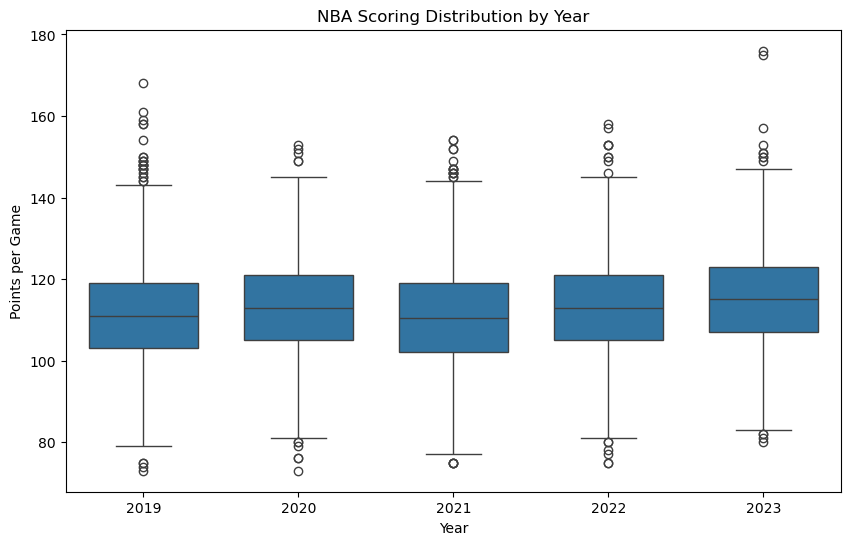

In [160]:
# visualization for rising action

plt.figure(figsize=(10, 6))
sns.boxplot(data=reg_all_games, x='game_year', y='points', width=0.7)
plt.title('NBA Scoring Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Points per Game')

#### Climax

Looking at the data, we uncovered a remarkable transformation in several NBA teams' offensive capabilities. The New York Knicks led this offensive revolution with an 14.7-point improvement per game, followed by Sacramento Kings and Memphis Grizzlies. These weren't minor adjustments but transformative improvements in offensive capability.

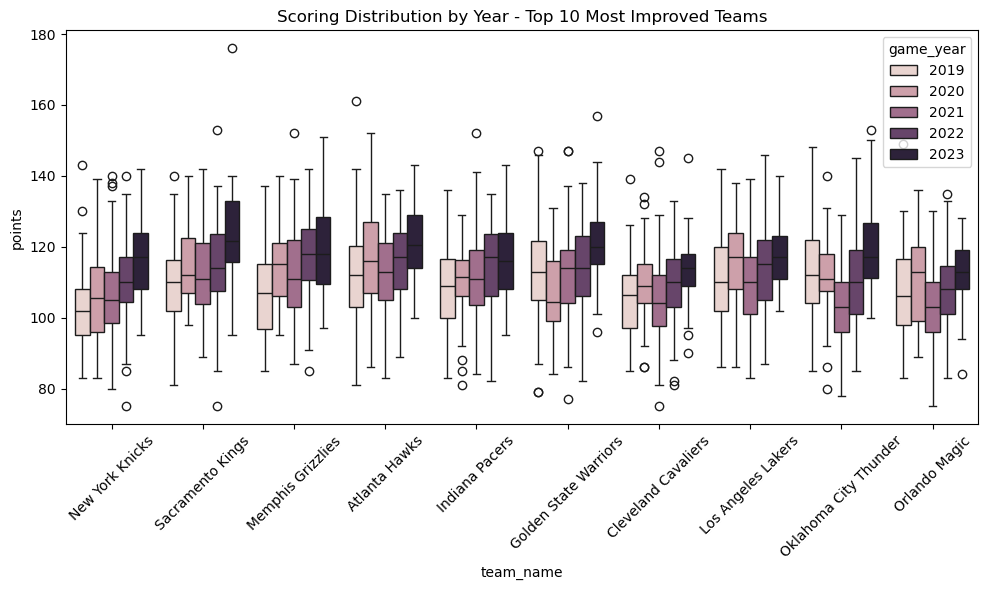

In [170]:
team_improvement = pd.DataFrame(improvement_list)

top_10_teams = team_improvement.sort_values(by='total_improvement', ascending=False).head(10)['team_name_home'].tolist()
top_10_data = reg_all_games[reg_all_games['team_name'].isin(top_10_teams)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=top_10_data, x='team_name', y='points', hue='game_year', order=top_10_teams)
plt.title('Scoring Distribution by Year - Top 10 Most Improved Teams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Falling action

What makes these improvements even more fascinating is their trajectory. Rather than showing gradual, year-over-year progress, both the New York Knicks and Sacramento Kings displayed sharp inflection points in their scoring output.
Their leap from a bottom-tier offensive team to leading the league in improvement showcased successful strategic shifts could rapidly alter a team's performance ceiling.

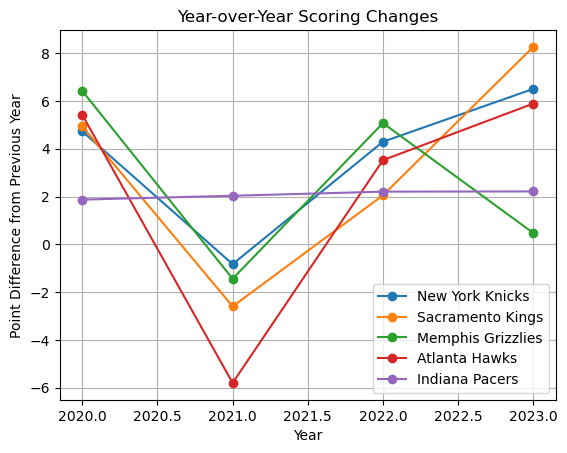

In [20]:
# visualization for falling action

for team in top_5_teams:
    team_data = team_year_avg[team_year_avg['team_name']==team]
    changes = team_data['points'].diff()
    plt.plot(team_data['game_year'][1:], changes[1:], marker='o', label=team)
plt.title('Year-over-Year Scoring Changes')
plt.xlabel('Year')
plt.ylabel('Point Difference from Previous Year')
plt.legend()
plt.grid(True)
plt.show()

#### Resolution

From an investment perspective, these improvements highlight teams that have successfully modernized their offensive approach. The NewYork Knicks and Sacramento Kings, in particular, have demonstrated the ability to significantly enhance their scoring output, suggesting potential for continued growth and value appreciation. 

#### 5. Which teams have demonstrated the best defensive metrics (e.g., blocks and steals), and how has this impacted their winning consistency?

Introduction
- Defense often wins championships. We analyzed defensive metrics from 2019-2023 to identify teams with the strongest defensive capabilities.

In [21]:
sns.scatterplot(data=defense_analysis, 
                x='avg_blocks', y='avg_steals',
                size='win_rate', sizes=(50, 400),
                alpha=0.6)
plt.title('NBA Teams Defensive Profile')
plt.xlabel('Average Blocks per Game')
plt.ylabel('Average Steals per Game')
plt.show()

NameError: name 'defense_analysis' is not defined

In [89]:
# home games stats
home_defense = regular_games[['team_name_home', 'blk_home', 'stl_home', 'wl_home']].rename(
   columns={'team_name_home': 'team_name', 
           'blk_home': 'blocks',
           'stl_home': 'steals',
           'wl_home': 'win_loss'})

# away games stats
away_defense = regular_games[['team_name_away', 'blk_away', 'stl_away', 'wl_away']].rename(
   columns={'team_name_away': 'team_name',
           'blk_away': 'blocks', 
           'stl_away': 'steals',
           'wl_away': 'win_loss'})

# defense metrics
all_defense = pd.concat([home_defense, away_defense])
defense_stats = all_defense.groupby('team_name').agg(
    avg_blocks=('blocks', 'mean'),
    avg_steals=('steals', 'mean')
).reset_index()

# win rate 
wins = all_defense[all_defense['win_loss'] == 'W'].groupby('team_name').size()
total_games = all_defense.groupby('team_name').size()
win_rates = (wins / total_games).reset_index(name='win_rate')

# defense rating
defense_analysis = pd.merge(defense_stats, win_rates, on='team_name')
defense_analysis['defense_rating'] = defense_analysis['avg_blocks'] + defense_analysis['avg_steals']
defense_sorted = defense_analysis.sort_values(
   by=['defense_rating', 'win_rate'], 
   ascending=[False, False]
)

print("Teams with the best defensive metrics and their win consistency:")
print(defense_sorted.head(10))

Teams with the best defensive metrics and their win consistency:
                 team_name  avg_blocks  avg_steals  win_rate  defense_rating
14       Memphis Grizzlies    5.619718    8.653521  0.546479       14.273239
27         Toronto Raptors    5.036932    8.914773  0.568182       13.951705
17  Minnesota Timberwolves    5.397101    8.423188  0.431884       13.820290
22      Philadelphia 76ers    5.336158    8.050847  0.635593       13.387006
11          Indiana Pacers    5.576271    7.731638  0.457627       13.307910
1           Boston Celtics    5.485876    7.502825  0.621469       12.988701
13      Los Angeles Lakers    5.355114    7.508523  0.528409       12.863636
9    Golden State Warriors    4.713043    8.043478  0.530435       12.756522
10         Houston Rockets    4.810734    7.892655  0.381356       12.703390
23            Phoenix Suns    4.628895    7.824363  0.577904       12.453258


Rising Action
- Looking at regular season games, we discovered that teams excel in different aspects of defense.
- The Memphis Grizzlies lead with all three defensive metrics, while the Toronto Raptors show exceptional steal rates.

Climax
- Our analysis reveals interesting patterns in defensive efficiency.
- The top performers show remarkable balance: Memphis Grizzlies average 5.62 blocks and 8.65 steals, while Philadelphia 76ers combine strong defensive metrics with the highest win rate (63.6%) among top defenders.

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(defense_sorted['defense_rating'], 
           defense_sorted['win_rate'], 
           alpha=0.6)

for idx, row in defense_sorted.head(6).iterrows():
    plt.annotate(row['team_name'], 
                (row['defense_rating'], row['win_rate']))

plt.xlabel('Defense Rating (Blocks + Steals)')
plt.ylabel('Win Rate')
plt.title('Relationship Between Defensive Performance and Win Rate')

NameError: name 'defense_sorted' is not defined

<Figure size 1000x600 with 0 Axes>

Resolution
- The Philadelphia 76ers and Boston Celtics stand out as particularly attractive opportunities, combining elite defensive metrics with high win rates (over 60%).
- These teams demonstrate that strong defensive fundamentals translate to consistent winning performance, suggesting stable long-term value potential.